# Analysis of Magnetometer Data From Simulated Earth Orbit

## Data for 10 orbits, no eccentricity 

The first set of simulation data analyzed was for a perfectly circular,spin-stabilized equatorial orbit propagated for just over half a day

Text(0, 0.5, 'B-Field Magnitude (nT)')

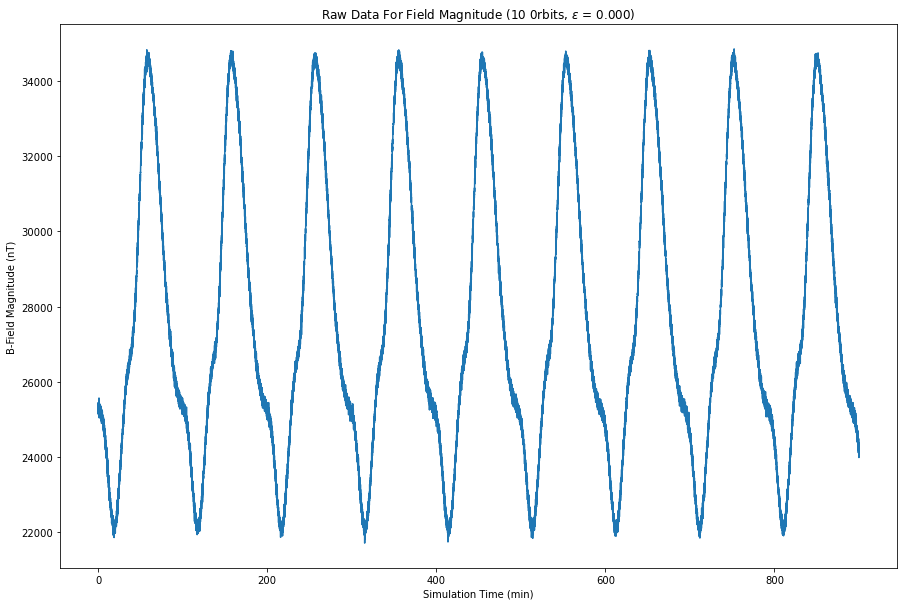

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append("src")
#import algorithms
from sinefit import sinfit     
from peakfinder import peakfinder
from smoothing import smoothTriangle

# import data from csv
data = np.genfromtxt('Data_Sets/e0_10O_axis.csv', delimiter=',')
time = data[:,0]
x_data = data[:,1]
y_data = data[:,2]
z_data = data[:,3]

# scalar magnitude used to allow for easier identification of orbit parameters
b_mag = np.sqrt((x_data)**2 + (y_data)**2 + (z_data)**2)


plt.rcParams["figure.figsize"]=15,10 
plt.plot(time, b_mag)
plt.title('Raw Data For Field Magnitude (10 0rbits, $\epsilon$ = 0.000)')
plt.xlabel('Simulation Time (min)')
plt.ylabel('B-Field Magnitude (nT)')


### Raw Data:

As expected there is little variation in the data due to the perfect orbit. The slight discrepancies in the peak values can be attributed completely to the noise modeling factored into the simulation.


## Sinusoid Fitting:

Amplitude= -5087.467572704749, Angular freq.= 0.06356037522970524, Period = 98.85381079756606, Phase= 0.6838333269209343 


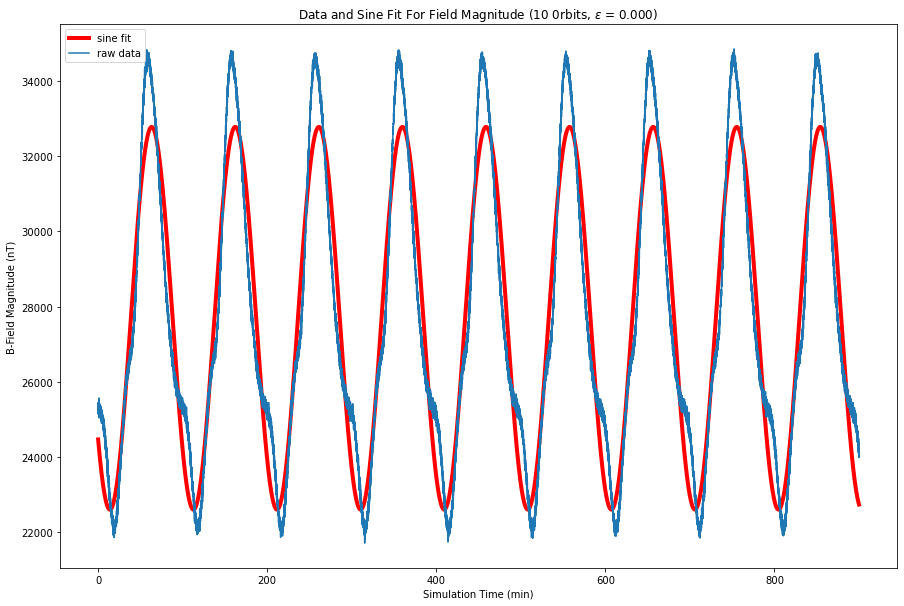

In [2]:
res = sinfit(time, b_mag)
plt.plot(time, res["fitfunc"](time), "r-", label="sine fit", linewidth=4)
plt.plot(time, b_mag, label="raw data")
plt.title('Data and Sine Fit For Field Magnitude (10 0rbits, $\epsilon$ = 0.000)')
plt.xlabel('Simulation Time (min)')
plt.ylabel('B-Field Magnitude (nT)')
plt.legend(loc='upper left')
print( "Amplitude= %(amp)s, Angular freq.= %(omega)s, Period = %(period)s, Phase= %(phase)s " % res )

# outputs parameters of the fitted sine function. 

## Fit Analysis:

Through application of optical analysis, it is obvious that the sinusoid fit is an accurate representation of the data in terms of frequency and such. This information rather than accurate fitting for numbers is more important for the type of analysis being conducted. The 98 minute period provided by the fit is well within the expected range of about 1.5 hours that orbits in LEO generally follow. Any direct determinations of orbit geometry or spacecraft attitude would require other sensor inputs and filters to output state vectors, exponentially complicating the task at hand and well beyond the scope of this project. There is a great deal of information to be gained from this fit, but a $\chi^2$ check would fail miserably due to the large amounts of points outside the fit. An FFT analysis could possibly determine exactly how close the fit is and allow for error bound calculations, but simple observation will suffice for now.

## Data for 100 orbits, zero eccentricity

With a data set run for 10 times as long, the variations in magnitude of the peaks due to sensor noise are more prominent. However, they reveal nothing about the orbit, instead providing possible information about sensor noise if taken as raw data.

## Sinusoid Fitting:

Text(0, 0.5, 'B-Field Magnitude (nT)')

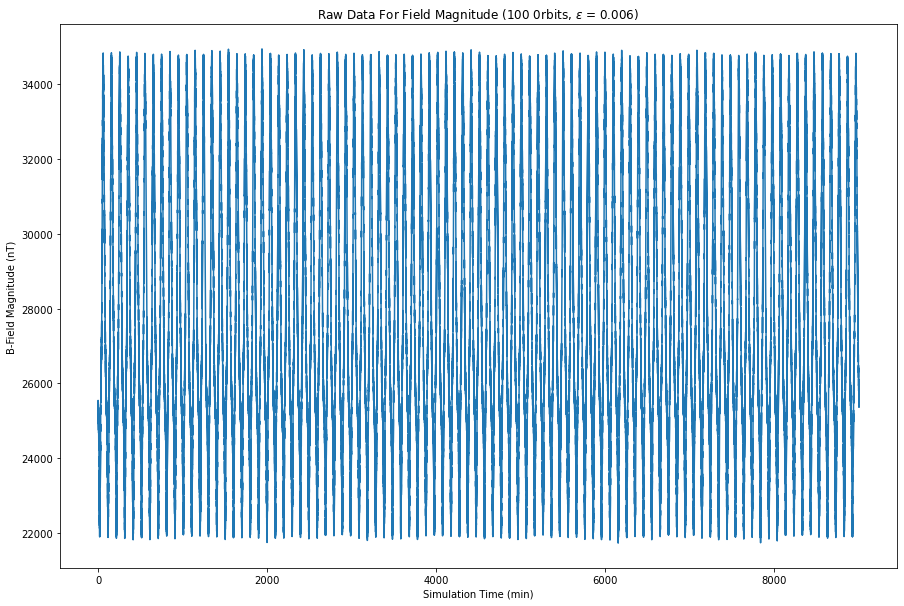

In [3]:
data = np.genfromtxt('Data_Sets/e0_100O_axis.csv', delimiter=',')
time = data[:,0]
x_data = data[:,1]
y_data = data[:,2]
z_data = data[:,3]

# scalar magnitude used to allow for easier identification of orbit parameters
b_mag = np.sqrt((x_data)**2 + (y_data)**2 + (z_data)**2)


plt.rcParams["figure.figsize"]=15,10 
plt.plot(time, b_mag)
plt.title('Raw Data For Field Magnitude (100 0rbits, $\epsilon$ = 0.006)')
plt.xlabel('Simulation Time (min)')
plt.ylabel('B-Field Magnitude (nT)')

Amplitude= -5116.313581744571, Angular freq.= 0.06350953087894091, Period = 98.9329510110273, Phase= 0.7066736919383358 


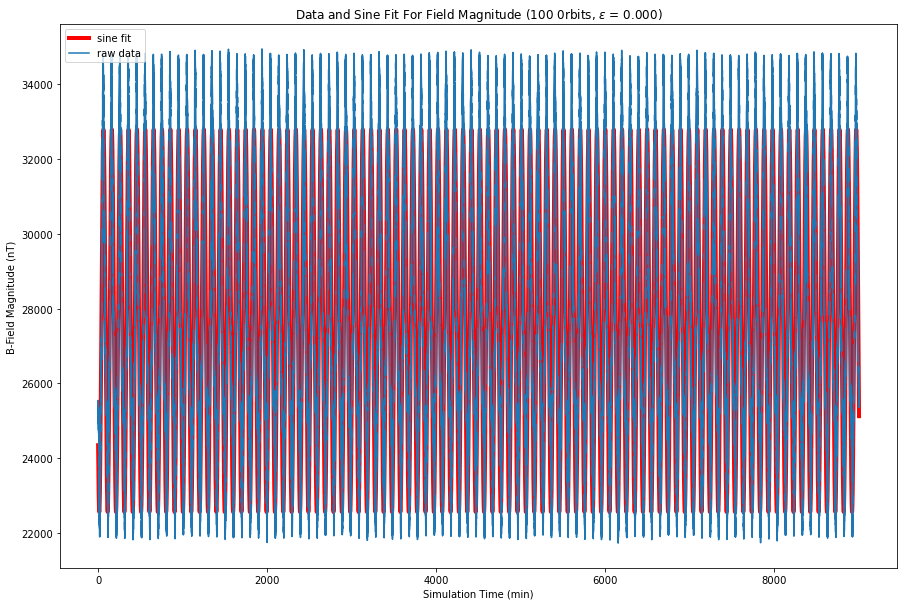

In [4]:
res = sinfit(time, b_mag)
plt.plot(time, res["fitfunc"](time), "r-", label="sine fit", linewidth=4)
plt.plot(time, b_mag, label="raw data")
plt.title('Data and Sine Fit For Field Magnitude (100 0rbits, $\epsilon$ = 0.000)')
plt.xlabel('Simulation Time (min)')
plt.ylabel('B-Field Magnitude (nT)')
plt.legend(loc='upper left')
print( "Amplitude= %(amp)s, Angular freq.= %(omega)s, Period = %(period)s, Phase= %(phase)s " % res )


## Fit Analysis:

Once again, we are provided with a fit that accurately tracks the frequency of the wave, while creating massive discrepancies in the amplitudes. As the fit is now shown to remain (relatively) accurate over large data sets, we can proceed to analysis of more complex orbits 

Text(0, 0.5, 'B-Field Magnitude (nT)')

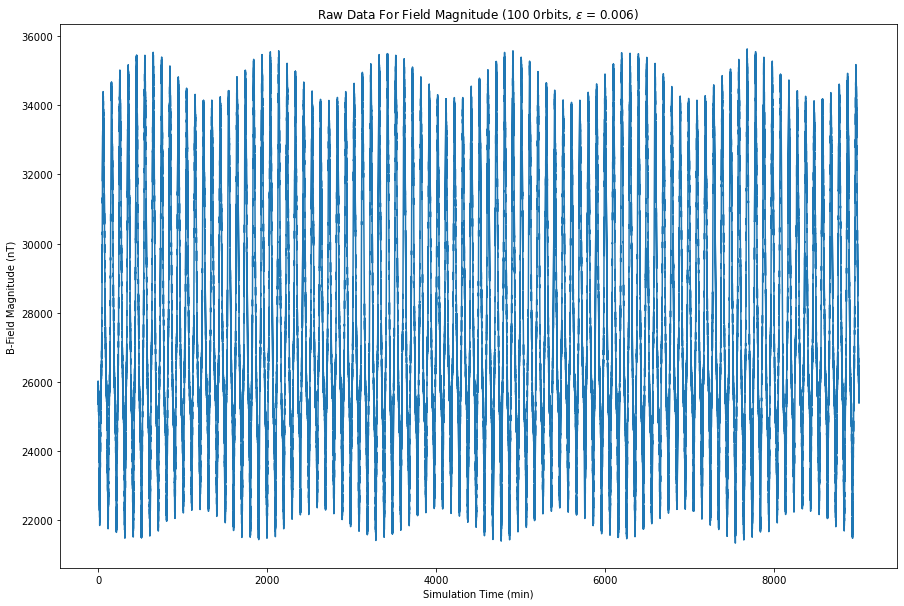

In [5]:
data = np.genfromtxt('Data_Sets/e006_100O_axis.csv', delimiter=',')
time = data[:,0]
x_data = data[:,1]
y_data = data[:,2]
z_data = data[:,3]

# scalar magnitude used to allow for easier identification of orbit parameters
b_mag = np.sqrt((x_data)**2 + (y_data)**2 + (z_data)**2)


plt.rcParams["figure.figsize"]=15,10 
plt.plot(time, b_mag)
plt.title('Raw Data For Field Magnitude (100 0rbits, $\epsilon$ = 0.006)')
plt.xlabel('Simulation Time (min)')
plt.ylabel('B-Field Magnitude (nT)')

### Raw Data:

Immediately apparent is another sinusoidal pattern that varies the amplitude of the magnetic field magnitude. As this is clearnly not jitter, it must hold some physical significance for the orbit. A full discussion is provided in the wiki, but a fit of this large sinusoid should return data about the orbit of the Earth.


### Smoothing:

To reduce the effort needed to create a peakfinder algorithm, I decided to smooth my data as much as possible first, leaving fewer artifacts and eliminating the need for further manual data manipulation to get a good fit

Text(0, 0.5, 'B-Field Magnitude (nT)')

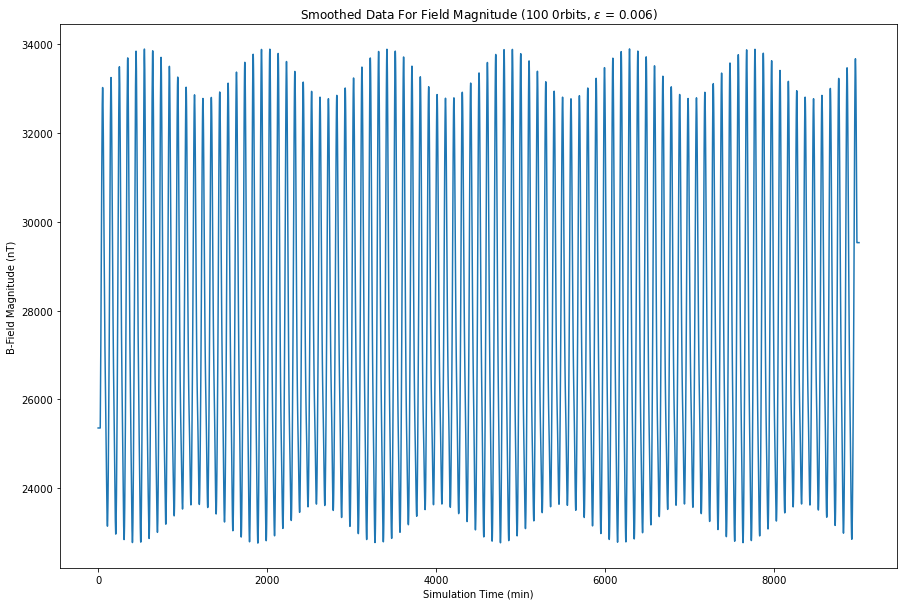

In [6]:
smooth = np.array(smoothTriangle(b_mag, 500))
plt.plot(time, smooth)
plt.title('Smoothed Data For Field Magnitude (100 0rbits, $\epsilon$ = 0.006)')
plt.xlabel('Simulation Time (min)')
plt.ylabel('B-Field Magnitude (nT)')

In [7]:
smooth = np.array(smooth)
ind_max2 = scipy.signal.argrelmax(smooth)
ind_min2 = scipy.signal.argrelmin(smooth)                                  
                                  

peaks, ind_max = peakfinder(smooth, time, 1000)
print('My algorithm: ', ind_max, len(ind_max))
print('Scipy peakfinder: ', ind_max2, len(ind_max2))

My algorithm:  [1600, 4571, 7537, 10498, 13455, 16410, 19366, 22324, 25286, 28254, 31226, 34204, 37186, 40168, 43148, 46123, 49091, 52054, 55013, 57969, 60925, 63881, 66841, 69805, 72775, 75751, 78731, 81714, 84694, 87672, 90644, 93610, 96571, 99528, 102484, 105439, 108397, 111359, 114326, 117299, 120277, 123258, 126240, 129220, 132195, 135164, 138128, 141086, 144042, 146998, 149955, 152914, 155878, 158848, 161823, 164804, 167786, 170767, 173745, 176717, 179683, 182644, 185601, 188557, 191512, 194470, 197432, 200398, 203371, 206348, 209330, 212313, 215293, 218268, 221237, 224201, 227160, 230116, 233071, 236028, 238987, 241951, 244920, 247895, 250876, 253858, 256839, 259817, 262789, 265755, 268717] 91
Scipy peakfinder:  (array([  1600,   4571,   7537,  10498,  13455,  16410,  19366,  22324,
        25286,  28254,  31226,  34204,  37186,  40168,  43148,  46123,
        49091,  52054,  55013,  57969,  60925,  63881,  66841,  69805,
        72775,  75751,  78731,  81714,  84694,  87672,  9

### Peakfinder Check:
On smoothed data, my filter outperformed the local maxima finder provided by the scipy.signal module, which piched up an obviously incorrect peak with a value of 6



# Orbit Properties Determination:

Text(0, 0.5, 'B-Field Magnitude (nT)')

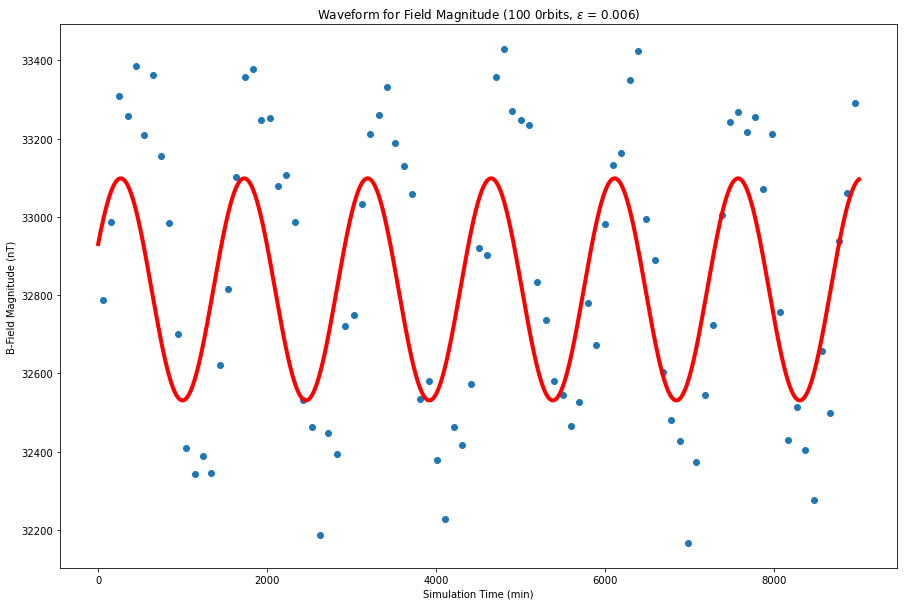

In [8]:
mxtime = []
mxdata = []


for i in ind_max2: #used scipy peakfinder bause something was breaking with data format, plus provided a better 
    mxtime = time[i]
    mxdata = b_mag[i]
   

        
       
mxsmooth = smoothTriangle(mxdata, 4)


bfit = sinfit(mxtime, mxsmooth)
plt.plot(time, bfit["fitfunc"](time), "r-", label="y fit curve", linewidth=4)
plt.scatter(mxtime, mxdata)
plt.title('Waveform for Field Magnitude (100 0rbits, $\epsilon$ = 0.006)')
plt.xlabel('Simulation Time (min)')
plt.ylabel('B-Field Magnitude (nT)')

In [9]:
print( "Amplitude= %(amp)s, Angular freq.= %(omega)s, Period = %(period)s, Phase= %(phase)s " % bfit )


Amplitude= 283.7546131553971, Angular freq.= 0.0043024157295501325, Period = 1460.3854443969703, Phase= 0.42043632709149553 


In [10]:
day = bfit['period']
day/60

24.339757406616172

# Analysis:

Finding a period of 24 hours for the fitted equation is eactly what would be expected for the occurence of effects that take place once per orbit. More specifically, the sinusoid is caused by the perigee and apogee of the orbit overlapping the peak and trough in the magnitude of the Earth's magnetic field (see wiki for details)